In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
import pandas as pd

data = pd.read_csv('311_Service_Requests_from_2010_to_Present_Open_Dining.csv')

In [ ]:
# This dataset is all 311 complaints filed under the category "open dining", there are 9,487

In [5]:
data.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'BBL', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Open Data Channel Type',
       'Park Facility Name', 'Park Borough', 'Vehicle Type',
       'Taxi Company Borough', 'Taxi Pick Up Location', 'Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
       'Latitude', 'Longitude', 'Location'],
      dtype='object')

In [6]:
#create a year column from the Created Date
data['Year'] = pd.DatetimeIndex(data['Created Date']).year

In [7]:
data['Month'] = pd.DatetimeIndex(data['Created Date']).month

In [8]:
data['Year_Month'] = pd.to_datetime(data[['Year', 'Month']].assign(DAY=1))

In [9]:
#complaints by boroughs

In [10]:
data.groupby('Borough')['Unique Key'].count().sort_values(ascending=False)

Borough
MANHATTAN        5039
BROOKLYN         2343
QUEENS           1711
BRONX             292
STATEN ISLAND      94
Unspecified         8
Name: Unique Key, dtype: int64

<AxesSubplot:xlabel='Borough'>

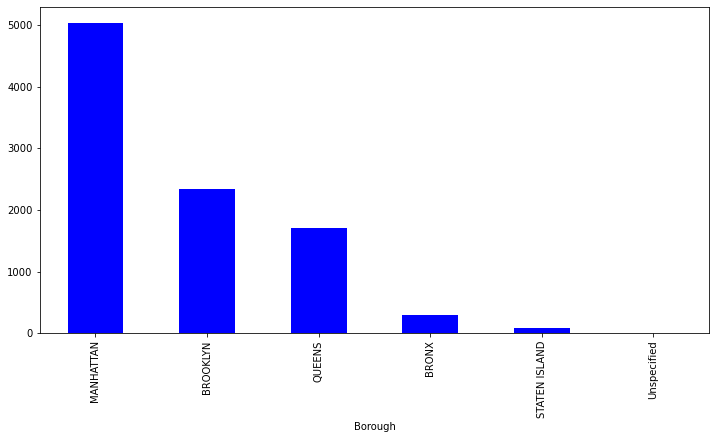

In [11]:
plt.figure(figsize = (12,6))
data.groupby('Borough')['Unique Key'].count().sort_values(ascending=False).plot.bar(color = 'b')

In [12]:
#complaints over time

In [13]:
data.groupby('Year_Month')['Unique Key'].count()

Year_Month
2020-07-01     882
2020-08-01    1033
2020-09-01     845
2020-10-01     601
2020-11-01     430
2020-12-01     316
2021-01-01     293
2021-02-01     149
2021-03-01     285
2021-04-01     349
2021-05-01     499
2021-06-01     430
2021-07-01     452
2021-08-01     378
2021-09-01     372
2021-10-01     535
2021-11-01     358
2021-12-01     293
2022-01-01     217
2022-02-01     242
2022-03-01     309
2022-04-01     219
Name: Unique Key, dtype: int64

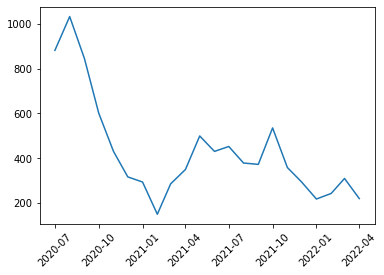

In [14]:
plt.plot(data.groupby('Year_Month')['Unique Key'].count())
ax = plt.gca()
ax.tick_params(axis='x', labelrotation = 45)

In [ ]:
#create datafram for total complaints by year

In [29]:
df_ym = data.groupby('Year_Month')[['Unique Key']].count()

In [31]:
df_ym.rename(columns={'Unique Key': 'Total Complaints'}, inplace=True)

In [36]:
df_ym = df_ym.reset_index()

In [44]:
df_ym['Year_Month']

0    2020-07-01
1    2020-08-01
2    2020-09-01
3    2020-10-01
4    2020-11-01
5    2020-12-01
6    2021-01-01
7    2021-02-01
8    2021-03-01
9    2021-04-01
10   2021-05-01
11   2021-06-01
12   2021-07-01
13   2021-08-01
14   2021-09-01
15   2021-10-01
16   2021-11-01
17   2021-12-01
18   2022-01-01
19   2022-02-01
20   2022-03-01
21   2022-04-01
Name: Year_Month, dtype: datetime64[ns]

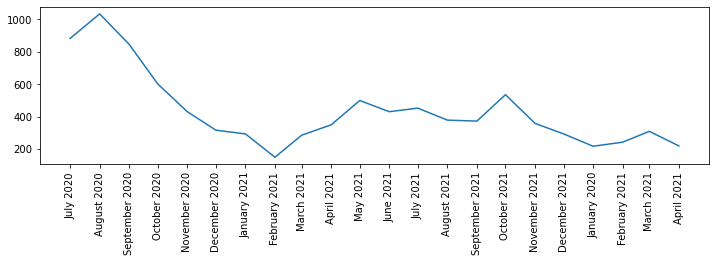

In [79]:
x = df_ym['Year_Month']
y = list(df_ym['Total Complaints'])
labels = ['July 2020', 'August 2020', 'September 2020', 'October 2020', 'November 2020', 'December 2020', 
          'January 2021', 'February 2021', 'March 2021', 'April 2021', 'May 2021', 'June 2021', 
          'July 2021', 'August 2021', 'September 2021', 'October 2021',
         'November 2021', 'December 2021', 'January 2020', 'February 2021', 'March 2021', 'April 2021']

plt.plot(x, y)
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.rcParams["figure.figsize"] = (12,3)

plt.xticks(x, labels, rotation='vertical')
# Pad margins so that markers don't get clipped by the axes
plt.margins(0.05)
# Tweak spacing to prevent clipping of tick-labels
plt.subplots_adjust(bottom=0.15)
plt.tick_params(axis='x', labelrotation = 90)
plt.show()

In [54]:
#types of total complaints by raw counts

In [72]:
data.groupby('Descriptor')['Descriptor'].count().sort_values(ascending=False)

Descriptor
Sidewalk Zone Blocked      3759
Site Setup Condition       2983
Barrier Condition          1088
Street Zone Blocked        1058
Unauthorized Restaurant     309
Table Not in Compliance     253
ADA Ramp Missing             24
Utility Cover Blocked         9
Platform Condition            4
Name: Descriptor, dtype: int64

<AxesSubplot:xlabel='Descriptor'>

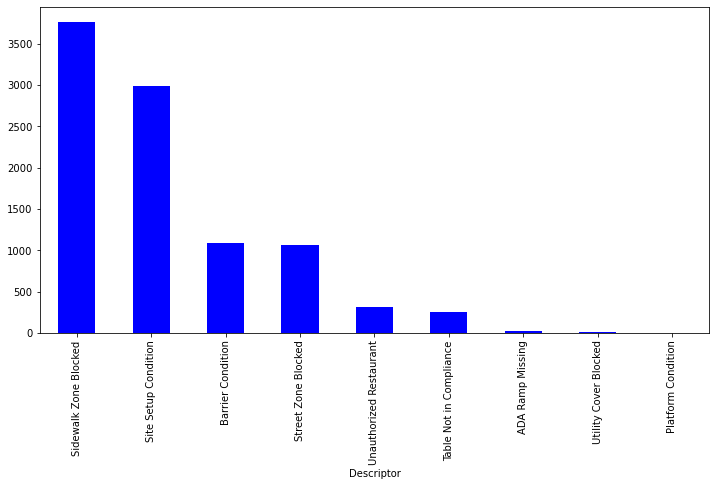

In [73]:
plt.figure(figsize = (12,6))
data.groupby('Descriptor')['Descriptor'].count().sort_values(ascending=False).plot.bar(color = 'b')

In [99]:
year_desc_count = data.groupby(['Year', 'Descriptor'])[['Unique Key']].agg('count').sort_values(['Unique Key', 'Year'], ascending = False)
year_desc_count

,,Unique Key
Year,Descriptor,
2021,Sidewalk Zone Blocked,1801
2020,Sidewalk Zone Blocked,1642
2021,Site Setup Condition,1388
2020,Site Setup Condition,1166
2021,Barrier Condition,553
2020,Street Zone Blocked,507
2021,Street Zone Blocked,466
2022,Site Setup Condition,429
2020,Barrier Condition,410


<AxesSubplot:xlabel='Year,Descriptor'>

<Figure size 864x432 with 0 Axes>

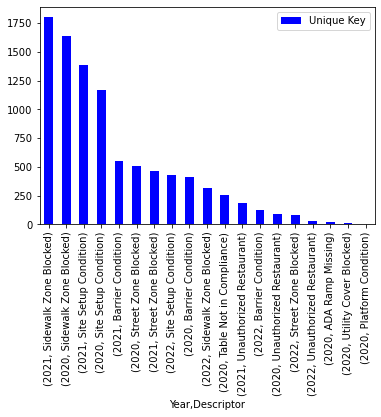

In [100]:
plt.figure(figsize = (12,6))
year_desc_count.plot.bar(color = 'b')